<a href="https://colab.research.google.com/github/timphamvn33/ACME-Project/blob/master/Final_Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io
url = "https://raw.githubusercontent.com/timphamvn33/ML_Project/Tim/life-expectancy.csv"
df = pd.read_csv(url)
df =np.array(df)

In [ ]:
print(df)

[['Afghanistan' 'AFG' 1950 27.638]
 ['Afghanistan' 'AFG' 1951 27.878]
 ['Afghanistan' 'AFG' 1952 28.361]
 ...
 ['Zimbabwe' 'ZWE' 2017 60.812]
 ['Zimbabwe' 'ZWE' 2018 61.195]
 ['Zimbabwe' 'ZWE' 2019 61.49]]


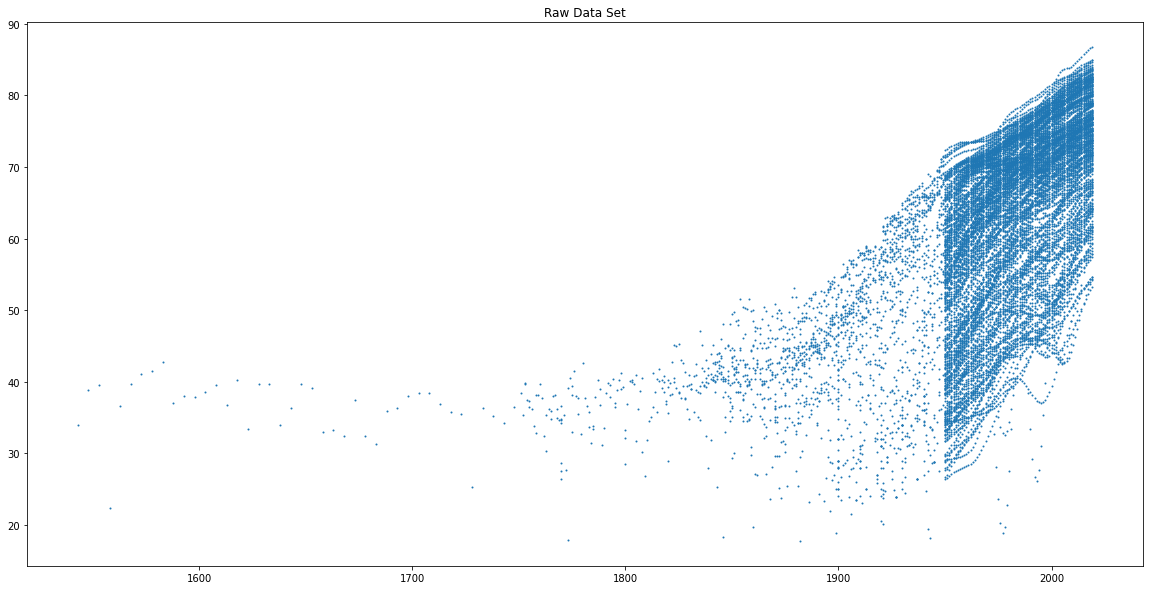

In [ ]:
years_raw = df[:, 2]
ages_raw = df[:, 3]
plt.figure(figsize=(20, 10))
plt.scatter(years_raw,ages_raw,  s=1)
plt.title("Raw Data Set")
plt.show()

In [ ]:
countries = list(set(df[:, 0])) # get the countries name
years = list(set(df[:, 2])) # get the year in the dataset   
print(years) 
data = {} # create the dict to get the year: age

for i in range (len(years)):
  avg_age = 0
  count_year=0
  for n in range (len(df)):
    if df[n, 2] == years[i]:
      avg_age+=df[n, 3]
      count_year+=1
  
  avg_age=avg_age/count_year
  data[years[i]]=avg_age
print(data)


[1543, 1548, 1553, 1558, 1563, 1568, 1573, 1578, 1583, 1588, 1593, 1598, 1603, 1608, 1613, 1618, 1623, 1628, 1633, 1638, 1643, 1648, 1653, 1658, 1663, 1668, 1673, 1678, 1683, 1688, 1693, 1698, 1703, 1708, 1713, 1718, 1723, 1728, 1733, 1738, 1743, 1748, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771, 1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782, 1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793, 1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837, 1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871, 1872, 1873, 1874, 187

Text(0.5, 1.0, 'Raw Human Lifespan Dataset Graph ')

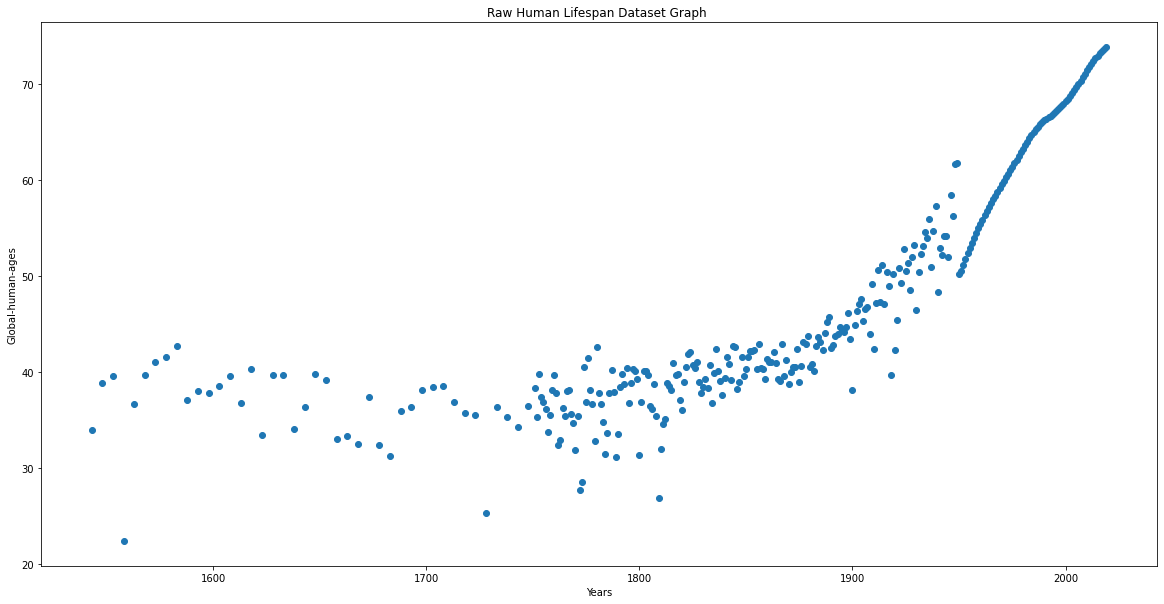

In [ ]:
year_list = [y for y in data.keys()]
age_list = [a for a in data.values()]
plt.figure(figsize=(20, 10))
plt.scatter(year_list, age_list)
plt.title("Traing Data ")
plt.xlabel("Years")
plt.ylabel("Global-human-ages")
plt.title("Raw Human Lifespan Dataset Graph ")

In [ ]:
n = len(year_list)
quater_years_list1 = np.array([year_list[i] for i in range(int(n/2), n)]) # get the year list from 1850 to 2019
quater_age_list1 = np.array([age_list[i] for i in range(int(n/2), n)])  # get the human ages from 1850 to 2019

print(n)
min_year = quater_years_list1.min() # convert quater_years_list1 from 0 to 160
quater_years_list1 -= min_year

print(min_year)


# apply linear-regression algorithm  to find the linear line base on the dataset 
def model(B0, B1):
  predictions = B0 + B1 * quater_years_list1
  return predictions
# find the loss of the prediction linear line with training set.
def loss(B0, B1):
  term1 = model(B0, B1)
  term2 = quater_age_list1 - term1
  term3 = term2 ** 2
  #term3 = np.abs(term2)
  term4 = np.sum(term3)
  return term4 / len(quater_years_list1)

# delta has to be small enough to have the small jump for B0 and B1; therefore can easy to get the right spot 
delta = 0.00002
B0 =45
B1 = 0

losses = []
# coordinate descent. Turning the linear line many times until the loss is minimized 
for i in range(300000):
  # update B0
  l1 = loss(B0, B1)
  l2 = loss(B0 - delta, B1)
  partial_wrt_B0 = (l2 - l1) / delta
  # learning rate
  B0 = B0 + partial_wrt_B0 * delta 
  # update B1
  l1 = loss(B0, B1)
  l2 = loss(B0, B1 - delta)
  partial_wrt_B1 = (l2 - l1) / delta
  B1 = B1 + partial_wrt_B1 * delta # learning rate
  #print("Loss: ", loss(B0, B1))
  losses.append(loss(B0, B1))

  


# plt.plot(losses)
# losses[::-10]

311
1864


0.21763782287042321


Text(0, 0.5, 'Global-human-ages')

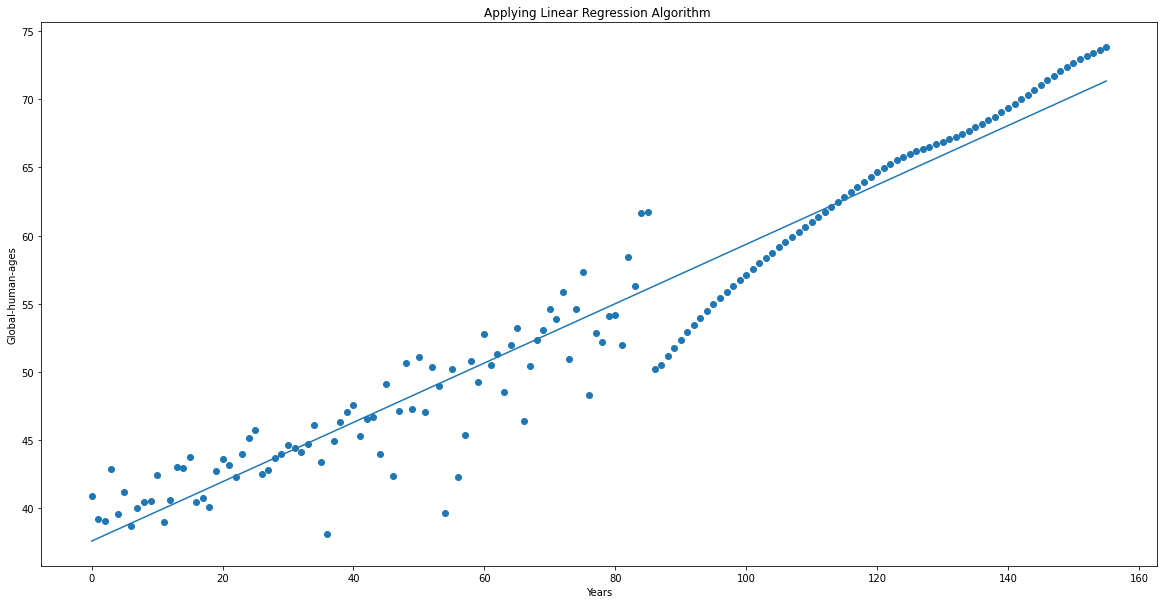

In [ ]:
#using Linear-regressiion algorithm and work on the dataset 
# plt.figure()
# plt.plot(half_years_list, half_age_list, 'rx')
x = quater_years_list1
y = (B0 + B1 * x) 

print(B1)

plt.figure(figsize=(20, 10))
plt.scatter(quater_years_list1, quater_age_list1)
plt.plot(x, y)
plt.title("Applying Linear Regression Algorithm ")
plt.xlabel("Years")
plt.ylabel("Global-human-ages")

156
---------evaluate the test----------
mean absolute error:  1.0769230769230769
root mean squared error:  1.9546132150665565
---------------The list of actual test and predict test----------------
[51, 52, 52, 52, 52, 53, 53, 53, 54, 54, 54, 54, 55, 55, 55, 56, 56, 56, 56, 57, 57, 57, 58, 58, 58, 58, 59, 59, 59, 60, 60, 60, 60, 61, 61, 61, 62, 62, 62, 62, 63, 63, 63, 64, 64, 64, 64, 65, 65, 65, 66, 66, 66, 67, 67, 67, 67, 68, 68, 68, 69, 69, 69, 69, 70, 70, 70, 71, 71, 71, 71, 72, 72, 72, 73, 73, 73, 73]
[52, 54, 54, 51, 58, 56, 61, 61, 50, 50, 51, 51, 52, 52, 53, 53, 54, 54, 55, 55, 56, 56, 57, 57, 57, 58, 58, 59, 59, 59, 60, 60, 60, 61, 61, 62, 62, 62, 63, 63, 63, 64, 64, 64, 65, 65, 65, 65, 66, 66, 66, 66, 66, 67, 67, 67, 67, 67, 68, 68, 68, 69, 69, 69, 69, 70, 70, 71, 71, 71, 72, 72, 72, 72, 73, 73, 73, 73]
0.9216075192628407


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Text(0, 0.5, 'Global-human-ages')

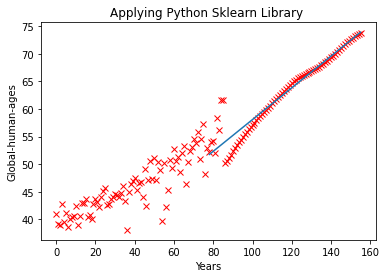

In [ ]:
#using Sklearn to find the linear and compare with the algorithm 
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from sklearn import metrics

X = quater_years_list1  
y = quater_age_list1  

# X= np.matrix(X).T
n1 = len(X)
print(n1)

model = LinearRegression()
# get the half of the data to test
X_train1 = [X[i] for i in range(int(n1/2), n1)]
Y_train1 =  [y[i] for i in range(int(n1/2), n1)]
                                 
X_test1 = [X[i] for i in range(int(len(X)/2), int(len(X)))]                      
Y_test1 = [y[i] for i in range(int(len(y)/2), int(len(y)))]

X_train1= np.matrix(X_train1).T
X_test1 = np.matrix(X_test1).T

model.fit(X_train1, Y_train1)


y_predict = model.predict(X_test1)


plt.plot(quater_years_list1, quater_age_list1, 'rx')

y_predict_int= [int(i) for i in y_predict]
y_test_int = [int(i) for i in Y_test1]

plt.plot(X_test1, y_predict)
# Evaluate the model over the test data

model_cofidence = model.score(X_test1, Y_test1)
mae= metrics.mean_absolute_error(y_test_int, y_predict_int)
rmse = np.sqrt(metrics.mean_squared_error(y_test_int, y_predict_int))
# base on the MAE and RMSE we can tell that linear regression have the error but the predict is pretty close the actual. 
print("---------evaluate the test----------")
print('mean absolute error: ', mae)
print('root mean squared error: ', rmse)

print("---------------The list of actual test and predict test----------------")
print(y_predict_int)
print(y_test_int)
print(model_cofidence)
plt.title("Applying Python Sklearn Library ")
plt.xlabel("Years")
plt.ylabel("Global-human-ages")